In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


**Mean\Target encoding**

In [7]:
df['Car_Name'] = df['Car_Name'].map(df.groupby(['Car_Name'])['Selling_Price'].mean())

In [8]:
df = df.rename({'Car_Name': 'Car_name_encoded'}, axis=1)
df.head()

,Car_name_encoded,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2.862500,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,3.158333,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.472222,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.512500,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.540000,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Добавим колонку - Currenty_Year. Вычтим из нее колонку Year и получим количество лет авто**

In [9]:
df['Currenty_Year'] = 2023
df['Car_age'] = df['Currenty_Year'] - df['Year']

In [10]:
df = df.drop(['Currenty_Year', 'Year'], axis=1)
df.head()

,Car_name_encoded,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2.862500,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,3.158333,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.472222,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.512500,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.540000,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


**One-hot encoding**

In [11]:
print(f'Fuel type unique value:{df.Fuel_Type.unique()}')
print(f'Seller type unique value:{df.Seller_Type.unique()}')
print(f'Transmission unique value:{df.Transmission.unique()}')

Fuel type unique value:['Petrol' 'Diesel' 'CNG']
Seller type unique value:['Dealer' 'Individual']
Transmission unique value:['Manual' 'Automatic']


In [12]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True, dtype=int)
df.head()

,Car_name_encoded,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.862500,3.35,5.59,27000,0,9,0,1,0,1
1,3.158333,4.75,9.54,43000,0,10,1,0,0,1
2,7.472222,7.25,9.85,6900,0,6,0,1,0,1
3,2.512500,2.85,4.15,5200,0,12,0,1,0,1
4,4.540000,4.60,6.87,42450,0,9,1,0,0,1


<Axes: >

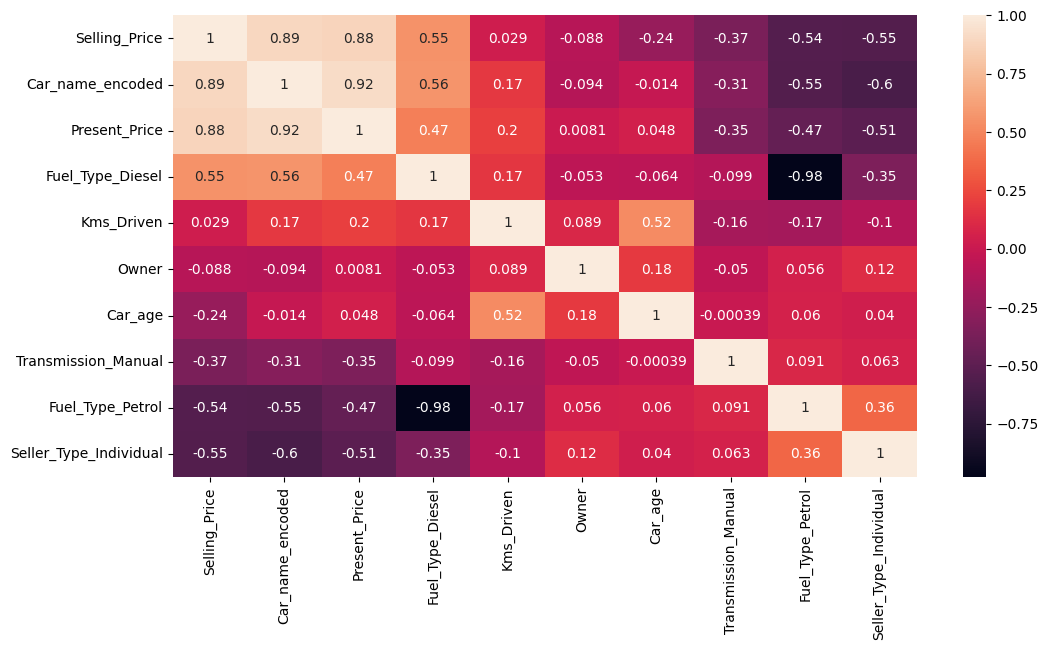

In [31]:
k = 10
cols = df.corr().nlargest(k, 'Selling_Price')['Selling_Price'].index
cm = df[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=cm, annot=True)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model.predict(X_test)
y_pred_actual = model.predict(X_train)

In [54]:
predictions = pd.DataFrame({'Actuals':y_test, 'predictions':y_pred, 'ytest - ypred': y_test - y_pred})

In [55]:
predictions.sample(5)

,Actuals,predictions,ytest - ypred
124,0.95,0.435414,0.514586
267,8.35,8.163450,0.186550
78,5.25,9.518966,-4.268966
248,4.00,2.891876,1.108124
144,0.60,0.704485,-0.104485


In [56]:
Coef_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
Coef_summary ['Coefficients'] = np.round(model.coef_,4)
Coef_summary

,Features,Coefficients
0,Car_name_encoded,0.3903
1,Present_Price,0.2699
2,Kms_Driven,-0.0000
3,Owner,-0.3346
4,Car_age,-0.3426
5,Fuel_Type_Diesel,1.2953
6,Fuel_Type_Petrol,0.1146
7,Seller_Type_Individual,-0.6267
8,Transmission_Manual,-1.4369


In [57]:
print("Mean Absolute Error : " ,metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: " ,metrics.r2_score(y_test,y_pred))

Mean Absolute Error :  1.1310174414304137
Mean Squared Error :  3.1472810913906586
Root Mean Squared Error :  1.7740578038470614
R2 Score:  0.8633730744440861


In [58]:
print ('Mean Absolute Error for Train:' , metrics.mean_absolute_error(y_train, y_pred_actual))
print ('Mean Squared Error for Train:' ,  metrics.mean_squared_error(y_train,y_pred_actual))
print ('Root Mean Squared Error for Train:' ,  np.sqrt(metrics.mean_squared_error(y_train,y_pred_actual)))
print ('R2 Score for Train:' ,  metrics.r2_score(y_train,y_pred_actual))

Mean Absolute Error for Train: 1.0511332633122392
Mean Squared Error for Train: 2.579738956678449
Root Mean Squared Error for Train: 1.606156579128713
R2 Score for Train: 0.9024195857688977
